
1.   Apply a logarithmic transformation to the cameraman.tif image.

2.   Apply a stretch function (plot), determining the inflection points of the stretch function х1, Х2, to enhance the contrast of the transformed image.

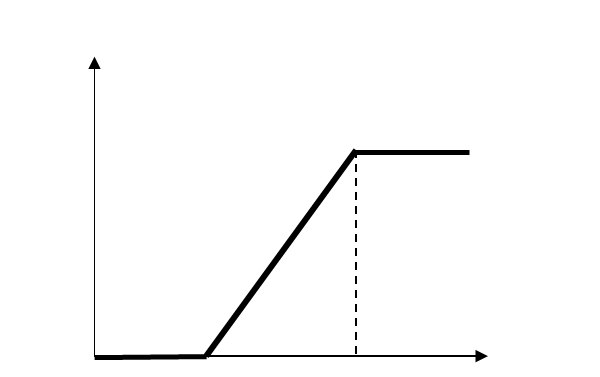

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

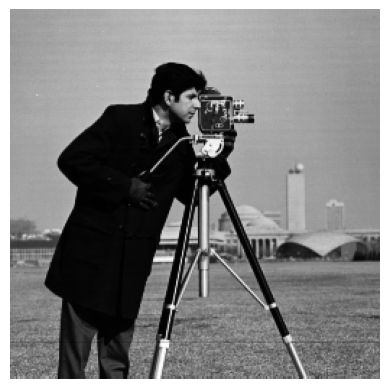

In [ ]:
image_path = '/content/drive/MyDrive/cameraman.tif'


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


def plot(img):
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

plot(image)


***Logarithmic transformation*** maps a narrow range of low brightness values to a wider range. For high signal values, it has the opposite effect: it stretches the range of dark shades while compressing the range of bright (white) shades. The process involves increasing the values of pixels with low intensities while making high intensities less saturated. This helps to highlight details in dark areas.

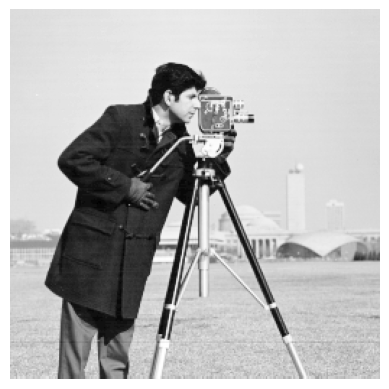

In [ ]:

c = 1
log = c*np.log(image + 1)
x_max = np.max(log)
x_min = np.min(log)

linear_contrast = (255*(log-x_min)) / (x_max-x_min)

plot(linear_contrast)

We will construct a histogram and determine the inflection points of the stretch function. The histogram shows the relationship between the pixel intensity values (on the x-axis) and their frequency in the image (on the y-axis). By using the histogram, we can identify the inflection points of the stretch function—values that are "uninteresting" for our specific task and can be removed.

The stretch function is necessary to narrow down the range of all values to those critically important for the task. For example, if we need to highlight details on a dark background and can disregard brighter areas, we simply discard those, thus narrowing the range of acceptable values. When linearly contrasting to a larger range, this allows us to reveal more details.

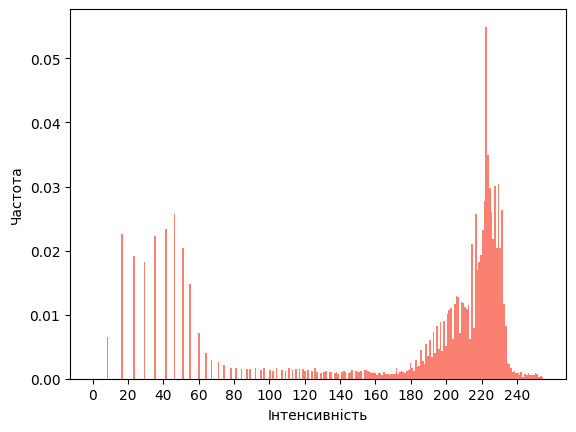

In [ ]:
def histograma(img):
  plt.hist(img.flatten(), bins=256, density=True, color='salmon')
  plt.xlabel('Інтенсивність')
  plt.ylabel('Частота')
  plt.xticks(np.arange(0,256,20))
  plt.show()

histograma(linear_contrast)

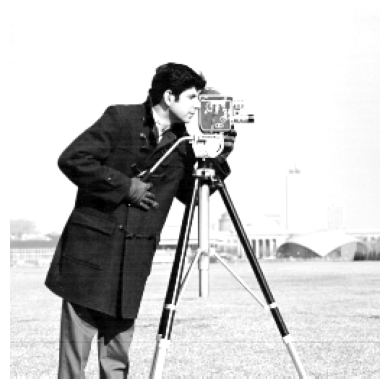

In [ ]:

x1, x2 = 10, 220

prep = np.piecewise(linear_contrast,
                    [linear_contrast <= x1, (x1 < linear_contrast) & (linear_contrast < x2),
                    linear_contrast >= x2],
                    [lambda x: 0, lambda x: (x-x1)*x2/(x2-x1), lambda x: x2])
linear_contrast = (255*(log-x_min)) / (x_max-x_min)
plot(prep)